# TensorFlow Keras API
Perhaps the most easiest Deep Learning API out their, [Keras](https://keras.io/), helps us easily prototype our Deep, ambitious Neural Nets. Built on top of TensorFlow (read uses TensorFlow as backend) it gives us the flexibilty of quick prototyping along with TensorFlow's battle readiness.

![](https://predictiveprogrammer.com/wp-content/uploads/2018/06/keras-tensorflow-logo.jpg)

You can find the true guiding principles behind keras [here](https://keras.io/#guiding-principles)

## Model in Keras
A model is perhaps the most important data structure in Keras. It is a collection of layers, where layer itself is a data structure that represents layer of a Neural Network!

There are two ways of defining a model in Keras:
1. Keras Sequential API: Stacking of layers one over another
2. Keras Functional API: For more complex models where their is not just stacking but branches as well

|![](../images/inception_block.png)|![](../images/sequential_model.png)|
|:--------------------------------:|:---------------------------------:|
|Use Functional API for complex models like this| Use Sequential API for linear stacked models|

Let's import our dependencies and load data! We will be working with MNIST dataset again.

You know the basic drill from 2nd tutorial - import tensorflow (we will also import keras and numpy), load dataset and flatten images to vector of 784

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib inline

In [2]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Sequential, Model

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Rather than adding one hot function inside graph as did earlier, we will be converting data to one hot using numpy operations!

In [5]:
def to_one_hot(y):
    y_1hot = np.zeros((y.shape[0], len(np.unique(y))))
    y_1hot[np.arange(y.shape[0]), y] = 1
    return y_1hot

In [6]:
y_train_1hot = to_one_hot(y_train)
y_test_1hot = to_one_hot(y_test)

y_train_1hot.shape, y_test_1hot.shape

((60000, 10), (10000, 10))

Sanity check. Let's check if our `to_one_hot()` function worked properly!

In [7]:
y_train[0], y_train_1hot[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

**Note:** We will be using simple Dense layers in this tutorial and will learn more about other types of layers from next tut onwards!

## Sequential API
Let's build a model using Sequential API first!

In [8]:
sequential_model = Sequential()

# adding 2 layers to the model
sequential_model.add(Dense(units=256, activation='tanh', input_dim=x_train.shape[1]))
sequential_model.add(Dense(units=10, activation='softmax'))

# Once we think that the model is perfect, we need to compile it before training!
sequential_model.compile(loss='categorical_crossentropy',
                         optimizer='sgd',
                         metrics=['accuracy'])

# We can also have a look at the model layers using .summary() method
sequential_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


`Param #` represents total weights and biases in that layer. Here, in `dense` we have 784 * 256 weights and 256 biases. So total Params = 200960. And in `dense_1` we have 256 * 10 weights and 10 biases. So total Params = 2570

In [9]:
# We will be using 20% of data as validation data
# We will be training for 10 epochs with batch size of 32
# This function returns history of training which we can 
# use to view performance at the end
hist = sequential_model.fit(x_train, y_train_1hot, 
                            epochs=10,
                            batch_size=32,
                            validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 378us/step - loss: 0.6421 - acc: 0.8161 - val_loss: 0.4372 - val_acc: 0.8727
Epoch 2/10
48000/48000 [==============================] - 10s 213us/step - loss: 0.4390 - acc: 0.8731 - val_loss: 0.3841 - val_acc: 0.8932
Epoch 3/10
48000/48000 [==============================] - 10s 215us/step - loss: 0.3918 - acc: 0.8897 - val_loss: 0.3651 - val_acc: 0.8953
Epoch 4/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.3817 - acc: 0.8911 - val_loss: 0.3519 - val_acc: 0.8996
Epoch 5/10
48000/48000 [==============================] - 11s 233us/step - loss: 0.3513 - acc: 0.8985 - val_loss: 0.3235 - val_acc: 0.9084
Epoch 6/10
48000/48000 [==============================] - 15s 311us/step - loss: 0.3553 - acc: 0.8969 - val_loss: 0.3386 - val_acc: 0.8992
Epoch 7/10
48000/48000 [==============================] - 13s 270us/step - loss: 0.3349 - acc: 0.9029 - val_loss: 0.

We just trained a Sequential model with 203,530 params and we didn't even require to write all that overhead code we wrote in 2nd tutorial!

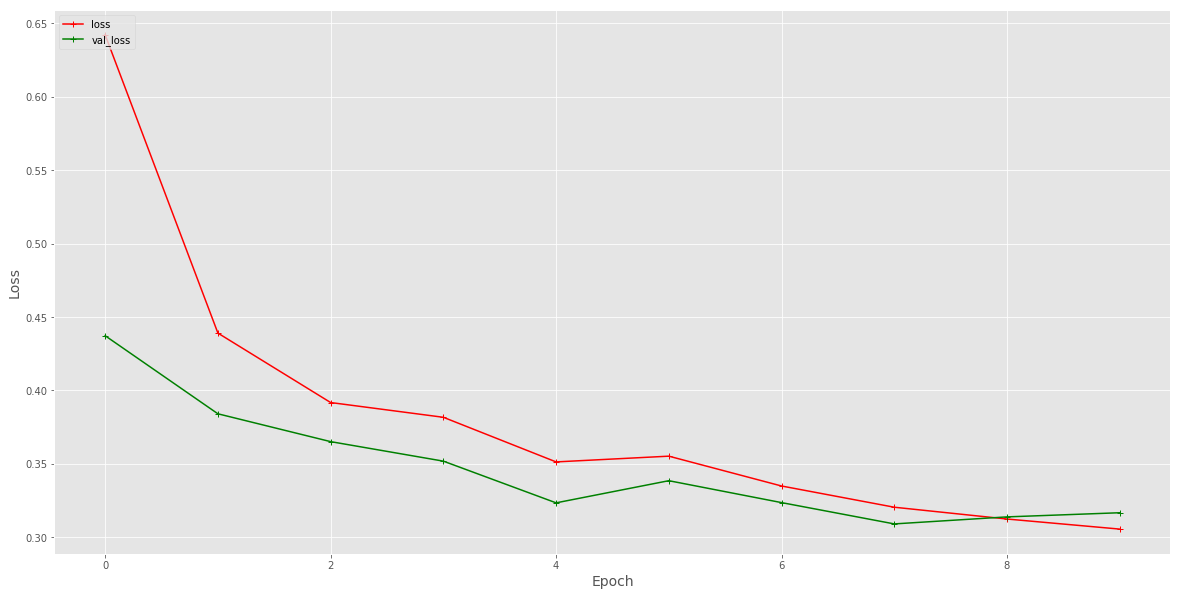

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(hist.history['loss'], 'r+-', label='loss')
plt.plot(hist.history['val_loss'], 'g+-', label='val_loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper left');

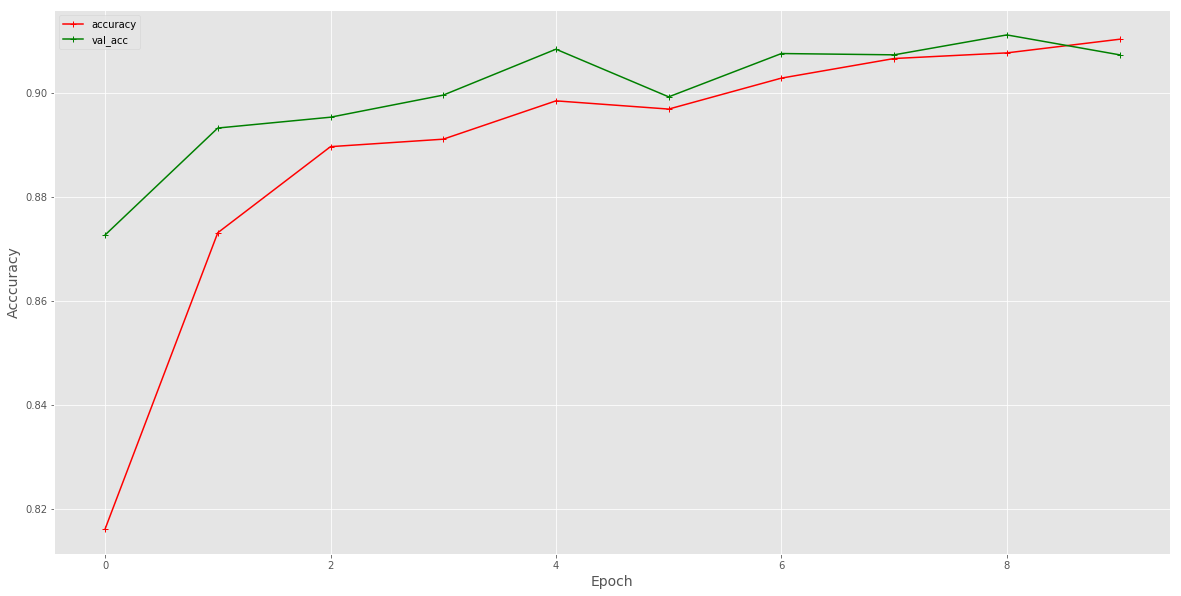

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(hist.history['acc'], 'r+-', label='accuracy')
plt.plot(hist.history['val_acc'], 'g+-', label='val_acc')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Acccuracy', fontsize=14)
plt.legend(loc='upper left');

## Functional API
Let's build a more complex NN using Functional API! We'll suggest that you restart the Jupyter Environment rather than using `tf.reset_default_graph()`. As we were getting a rather unique error that `input1:0` (referring to `in_layer` used ahead) isn't present in graph whenever we tried to define model directly. Okay, now rant is over let's move forward. ;)

Our model will look something like this: 
![Functional API example](../images/functional_api_example.png)

In [8]:
tf.reset_default_graph()

In [13]:
in_layer = Input(shape=(784,))

# This layer is just a bottleneck.
# A bottlneck in deep learning allows model
# to learn about only important features.
# This gives model a unique challenge to learn about data with less information!
dense1 = Dense(units=256, activation='relu')(in_layer)

# make a layer object using Dense(...).
# This object is callable, pass output of previous layer into this using
# (...) calling
branch1 = Dense(units=256, activation='tanh')(dense1)
branch2 = Dense(units=528, activation='tanh')(dense1)

# Concatenate branches so that we again get to 784 units
concat = Concatenate(axis=-1)([branch1, branch2])

# final layer
predictions = Dense(units=10, activation='softmax')(concat)

# build a model from the layers!
functional_model = Model(in_layer, predictions)

# Compile model!
functional_model.compile(loss='categorical_crossentropy',
                         optimizer='sgd',
                         metrics=['accuracy'])
functional_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 256)          200960      input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 256)          65792       dense_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 528)          135696      dense_4[0][0]                    
__________________________________________________________________________________________________
concatenat

In [10]:
# We will be using 20% of data as validation data
# We will be training for 10 epochs with batch size of 32
# This function returns history of training which we can 
# use to view performance at the end
hist = functional_model.fit(x_train, y_train_1hot, 
                            epochs=10,
                            batch_size=32,
                            validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 339us/step - loss: 0.4779 - acc: 0.8559 - val_loss: 0.2840 - val_acc: 0.9141
Epoch 2/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.2748 - acc: 0.9176 - val_loss: 0.2265 - val_acc: 0.9303
Epoch 3/10
48000/48000 [==============================] - 14s 294us/step - loss: 0.2297 - acc: 0.9318 - val_loss: 0.2138 - val_acc: 0.9386
Epoch 4/10
48000/48000 [==============================] - 13s 276us/step - loss: 0.1953 - acc: 0.9420 - val_loss: 0.1770 - val_acc: 0.9459
Epoch 5/10
48000/48000 [==============================] - 14s 288us/step - loss: 0.1758 - acc: 0.9479 - val_loss: 0.1714 - val_acc: 0.9484
Epoch 6/10
48000/48000 [==============================] - 14s 293us/step - loss: 0.1612 - acc: 0.9519 - val_loss: 0.1575 - val_acc: 0.9523
Epoch 7/10
48000/48000 [==============================] - 14s 289us/step - loss: 0.1415 - acc: 0.9571 - val_loss: 0.

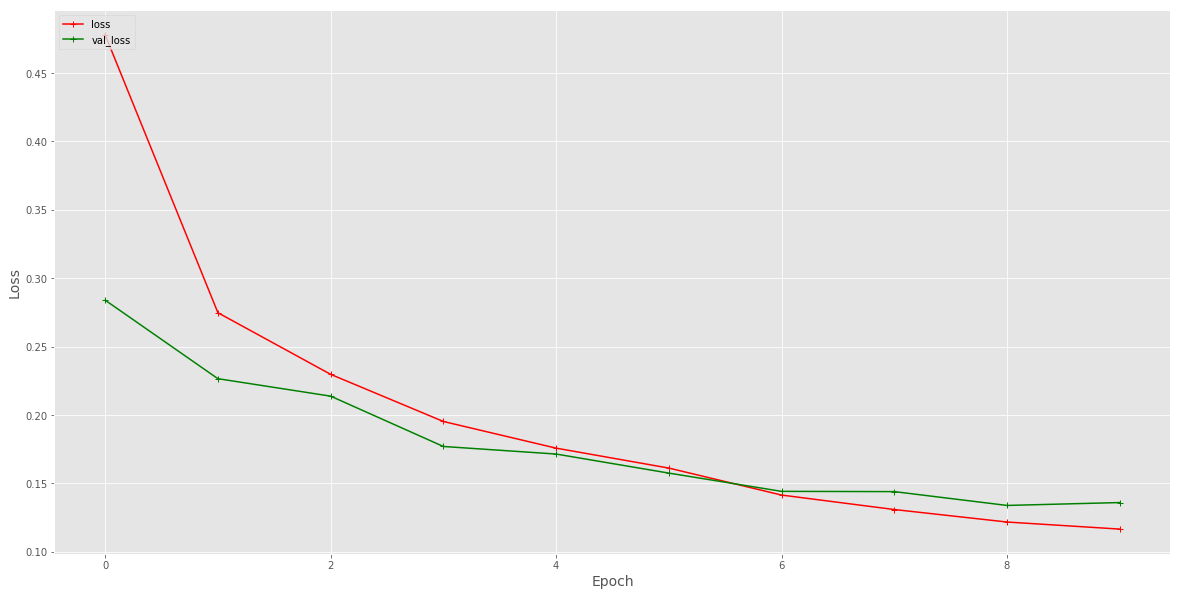

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(hist.history['loss'], 'r+-', label='loss')
plt.plot(hist.history['val_loss'], 'g+-', label='val_loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper left');

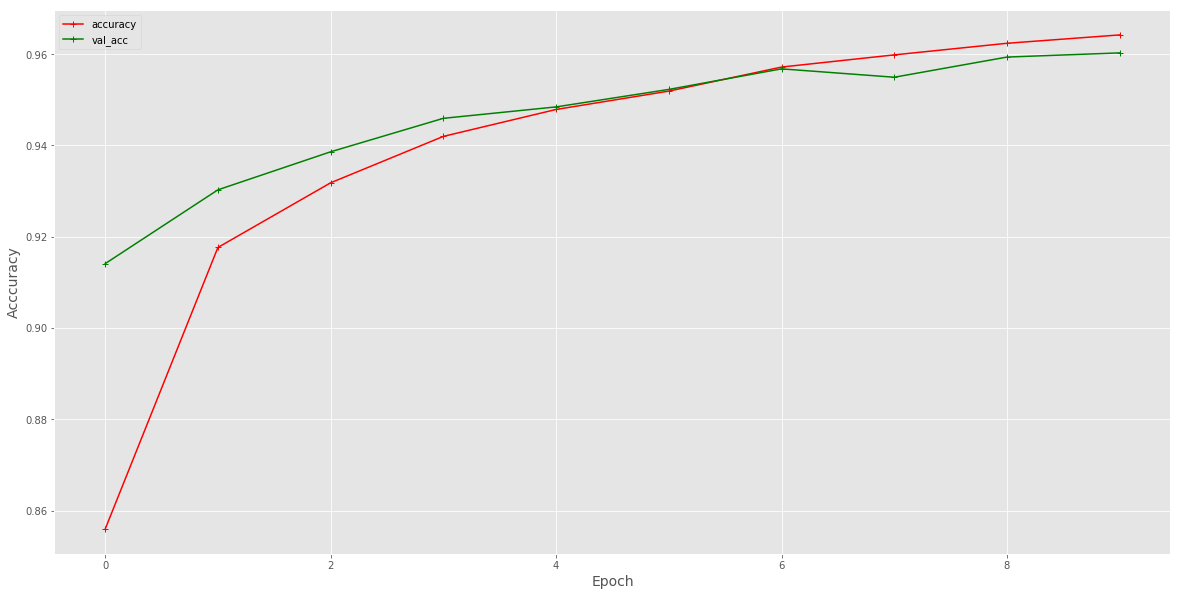

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(hist.history['acc'], 'r+-', label='accuracy')
plt.plot(hist.history['val_acc'], 'g+-', label='val_acc')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Acccuracy', fontsize=14)
plt.legend(loc='upper left');